In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import math
import numpy as np

In [2]:
df = pd.read_excel('network.xlsx')
df = df[df['Count'] > 0].copy()
df=df.reset_index()
df

,index,school name,abbreviation,target,Count,source
0,78,The University of Hong Kong,HKU,Australia,4700,HKG
1,79,The Chinese University of Hong Kong,CUHK,Australia,2700,HKG
2,80,The Hong Kong University of Science and Techno...,HKUST,Australia,1400,HKG
3,81,The Hong Kong Polytechnic University,PolyU,Australia,2600,HKG
4,82,City University of Hong Kong,CityU,Australia,1900,HKG
...,...,...,...,...,...,...
260,4952,Hong Kong Shue Yan University,HKSYU,United States,480,HKG
261,4953,The Hang Seng University of Hong Kong,HSUHK,United States,330,HKG
262,4954,Saint Francis University,SFU,United States,13000,HKG
263,4959,Singapore Institute of Technology,SIT,United States,2100,SGP


In [3]:
df['source'] = df['source'].replace({'HKG': 'Hong Kong', 'SGP': 'Singapore'})
df['target'] = df['target'].replace({'HKG': 'Hong Kong', 'SGP': 'Singapore'})
# Remove self-joins (where Source == Target)
df = df[df['source'] != df['target']]
#df.to_excel('network_no self-join.xlsx')
# Remove duplicate records (if the source and target nodes are the same, merge the weights)！！！！！！！
df = df.groupby(['source', 'target']).sum().reset_index()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source        78 non-null     object
 1   target        78 non-null     object
 2   index         78 non-null     int64 
 3   school name   78 non-null     object
 4   abbreviation  78 non-null     object
 5   Count         78 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.8+ KB


# 1.Basic network diagram

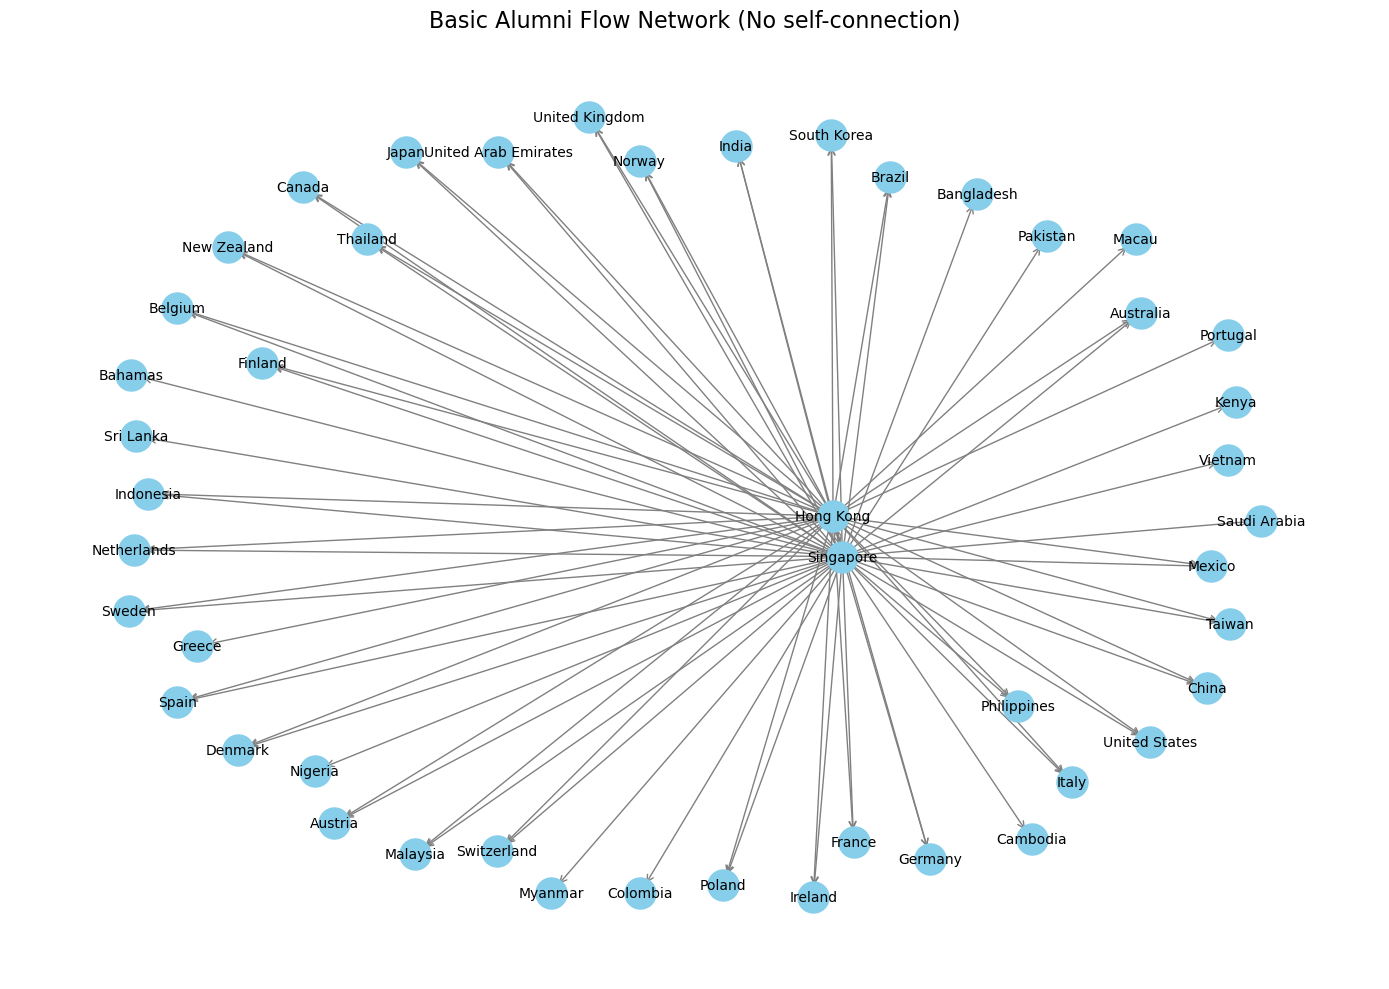

In [6]:
G = nx.DiGraph()
# Add edges with weight
for idx, row in df.iterrows():
    source = row['source']
    target = row['target']
    weight = row['Count']
    G.add_edge(source, target, weight=weight)


# Draw Basic Network Diagram
plt.figure(figsize=(14, 10))

# Layout: Spring layout (force-directed)
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Basic Alumni Flow Network (No self-connection)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# 2.compare which is more important, Hong Kong or Singapore.
Consider that although this is a directed graph, only Hong Kong and Singapore are connected to other countries, and Hong Kong and Singapore are connected to each other.

In [8]:
# Calculate in/out-degree (number of destinations)
out_degree = dict(G.out_degree())
in_degree = dict(G.in_degree())

# Calculate weighted in/out-degree (total alumni sent)
weighted_out_degree = dict(G.out_degree(weight='weight'))
weighted_in_degree = dict(G.in_degree(weight='weight'))

# Calculate betweenness centrality (just in case)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)

# Print comparison
print("Comparison of Hong Kong and Singapore:")

print(f"Hong Kong - Out Degree: {out_degree.get('Hong Kong', 0)}")
print(f"Singapore - Out Degree: {out_degree.get('Singapore', 0)}\n")
print(f"Hong Kong - in Degree: {in_degree.get('Hong Kong', 0)}")
print(f"Singapore - in Degree: {in_degree.get('Singapore', 0)}\n")


print(f"Hong Kong - Weighted Out Degree (Total Alumni Sent): {weighted_out_degree.get('Hong Kong', 0)}")
print(f"Singapore - Weighted Out Degree (Total Alumni Sent): {weighted_out_degree.get('Singapore', 0)}\n")
print(f"Hong Kong - Weighted in Degree (Total Alumni receive): {weighted_in_degree.get('Hong Kong', 0)}")
print(f"Singapore - Weighted in Degree (Total Alumni receive): {weighted_in_degree.get('Singapore', 0)}\n")


print(f"Hong Kong - Betweenness Centrality: {betweenness_centrality.get('Hong Kong', 0):.4f}")
print(f"Singapore - Betweenness Centrality: {betweenness_centrality.get('Singapore', 0):.4f}")

Comparison of Hong Kong and Singapore:
Hong Kong - Out Degree: 35
Singapore - Out Degree: 43

Hong Kong - in Degree: 1
Singapore - in Degree: 1

Hong Kong - Weighted Out Degree (Total Alumni Sent): 398260
Singapore - Weighted Out Degree (Total Alumni Sent): 444480

Hong Kong - Weighted in Degree (Total Alumni receive): 14000
Singapore - Weighted in Degree (Total Alumni receive): 16320

Hong Kong - Betweenness Centrality: 0.0019
Singapore - Betweenness Centrality: 0.0063


### Data explanation:
- source: departure point
- target: destination
- count: the number of alumni flowing from the departure point to the destination

### Analysis 
- Construct a directed graph from the departure point to the destination
- Calculate the in-degree and out-degree of Hong Kong and Singapore
- Calculate the degree centrality of Hong Kong and Singapore, and give an academic explanation.


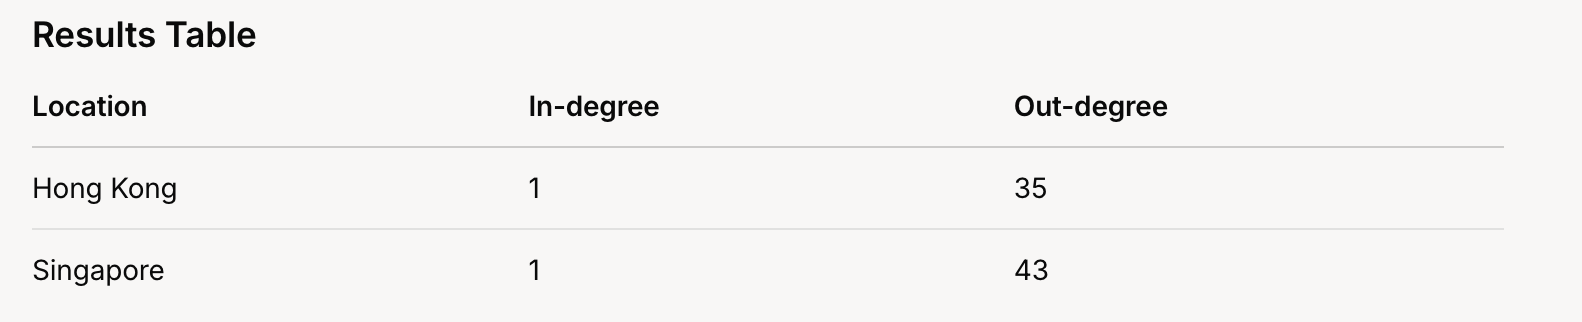

### Academic explanation
#### Out-degree and In-degree
In network analysis, a directed graph simulates the migration of Hong Kong and Singapore alumni to various countries, where edges represent flow directions and nodes represent countries. In-degree and out-degree provide insights into the roles of Hong Kong and Singapore in the network.

- Hong Kong:
1. Out-degree (35): indicates that Hong Kong is an important source of alumni, sending graduates to 35 different countries. Such a high out-degree reflects its wide international influence, with a large number of alumni flowing to the United States
2. In-degree (1): indicates that Hong Kong only receives alumni from Singapore

- Singapore:
1. Out-degree (43): shows that its influence is even wider, with alumni flowing to 43 countries including Hong Kong. This exceeds Hong Kong's out-degree, indicating that alumni destinations are more diversified, with a large number of alumni flowing to the United States (236,800 people)
2. In-degree (1): indicates that Singapore receives alumni from Hong Kong.

#### Outdegree centrality
- total 45
- Outdegree centrality: Singapore’s higher outdegree (43 vs. 35) suggests that it is more active or influential in global alumni communication, which may be due to the international reputation of its universities or mobility programs. Hong Kong also shows strong outbound connectivity, although with fewer destinations.

- Indegree centrality: Both nodes have an indegree of 1, reflecting two-way communication (Hong Kong to Singapore and vice versa), but in this dataset, only two-way flows are reflected because the data sources are limited to Hong Kong and Singapore. Two-way flows (Singapore to Hong Kong: 14,000; Hong Kong to Singapore: 16,320) highlight regional connections, which may be driven by proximity or economic ties. Singapore’s broader outbound influence may indicate that its alumni network is more global.